In [1]:
install.packages('titanic')
library(titanic)

Installing package into 'C:/Users/habiw/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'titanic' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\habiw\AppData\Local\Temp\Rtmp2bHJsX\downloaded_packages


In [2]:
head(titanic_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [3]:
tail(titanic_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [4]:
str(titanic_train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [5]:
summary(titanic_train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [6]:
library(dplyr)

titanic_sub = subset(titanic_train,select=c( 'Survived',  'Pclass',  'Sex',  'Age', 'SibSp', 'Parch', 'Fare','Embarked'))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
print(paste('Number of rows:', nrow(titanic_sub)))
print(paste('Number of cols:', ncol(titanic_sub)))

[1] "Number of rows: 891"
[1] "Number of cols: 8"


In [8]:
is.null(titanic_sub)

[1] FALSE

In [9]:
library(Amelia)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



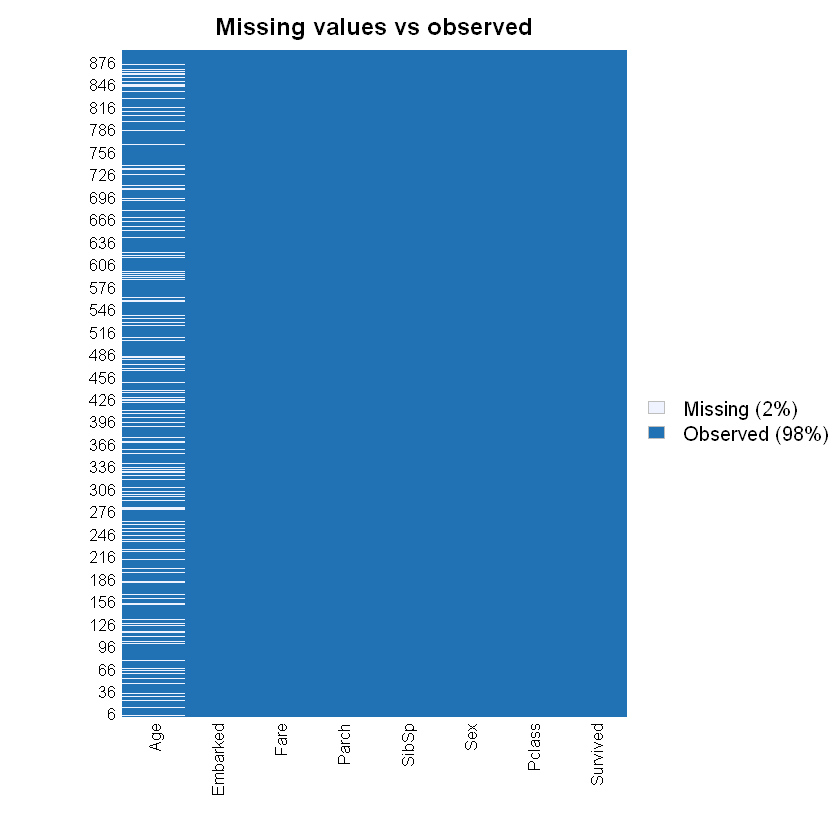

In [10]:
missmap(titanic_sub, main='Missing values vs observed')

## Remarks:
- There are some missing values in 'Age' column 

In [11]:
titanic_sub = na.omit(titanic_sub)

In [12]:
library(tidyverse)
library(tidyr)
# titanic_sub = na.omit(titanic_sub)
# titanic_sub  = titanic_sub %>% drop_na()

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v stringr 1.4.0
v tidyr   1.1.1     v forcats 0.5.0
v readr   1.3.1     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [13]:
print('After drop NA values:')
print(paste('Number of rows:', nrow(titanic_sub)))
print(paste('Number of cols:', ncol(titanic_sub)))

[1] "After drop NA values:"
[1] "Number of rows: 714"
[1] "Number of cols: 8"


In [14]:
summary(titanic_sub)

    Survived          Pclass          Sex                 Age       
 Min.   :0.0000   Min.   :1.000   Length:714         Min.   : 0.42  
 1st Qu.:0.0000   1st Qu.:1.000   Class :character   1st Qu.:20.12  
 Median :0.0000   Median :2.000   Mode  :character   Median :28.00  
 Mean   :0.4062   Mean   :2.237                      Mean   :29.70  
 3rd Qu.:1.0000   3rd Qu.:3.000                      3rd Qu.:38.00  
 Max.   :1.0000   Max.   :3.000                      Max.   :80.00  
     SibSp            Parch             Fare          Embarked        
 Min.   :0.0000   Min.   :0.0000   Min.   :  0.00   Length:714        
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:  8.05   Class :character  
 Median :0.0000   Median :0.0000   Median : 15.74   Mode  :character  
 Mean   :0.5126   Mean   :0.4314   Mean   : 34.69                     
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.: 33.38                     
 Max.   :5.0000   Max.   :6.0000   Max.   :512.33                     

In [15]:
str(titanic_sub)

'data.frame':	714 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 1 1 1 ...
 $ Pclass  : int  3 1 3 1 3 1 3 3 2 3 ...
 $ Sex     : chr  "male" "female" "female" "female" ...
 $ Age     : num  22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp   : int  1 1 0 1 0 0 3 0 1 1 ...
 $ Parch   : int  0 0 0 0 0 0 1 2 0 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: chr  "S" "C" "S" "S" ...
 - attr(*, "na.action")= 'omit' Named int [1:177] 6 18 20 27 29 30 32 33 37 43 ...
  ..- attr(*, "names")= chr [1:177] "6" "18" "20" "27" ...


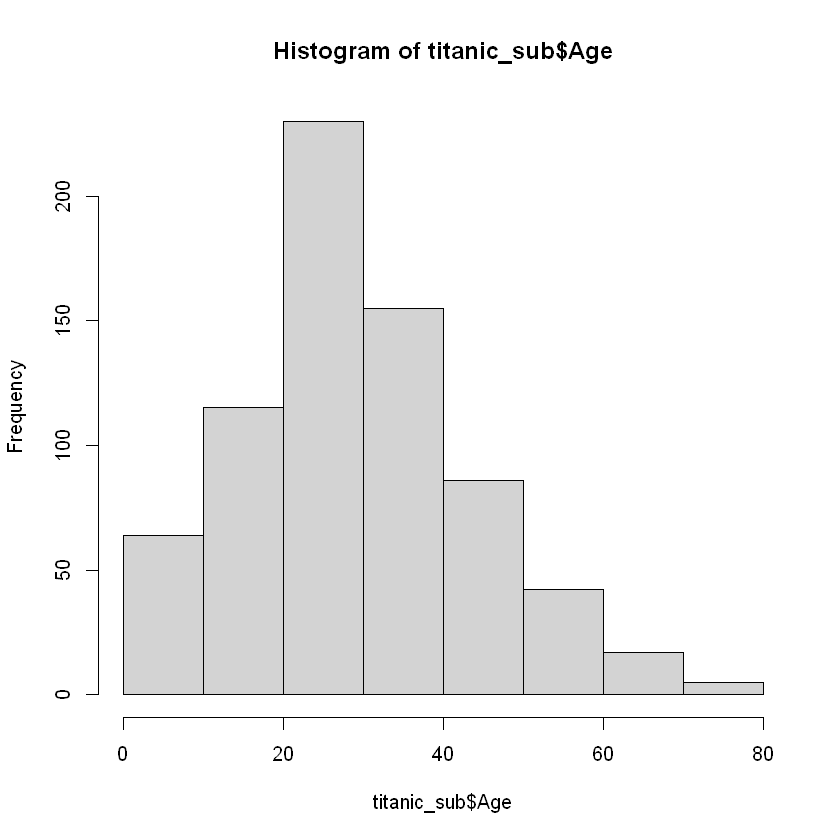

In [16]:
hist(titanic_sub$Age)

## Remarks:
- Data almost center round 20 to 40 Age
- The distribustion is right skewness

In [17]:
mean(titanic_sub$Age)

[1] 29.69912

In [18]:
median(titanic_sub$Age)

[1] 28

In [19]:
# Create the function 
getmode = function(v){
    uniqv = unique(v)
    uniqv[which.max(tabulate(match(v, uniqv)))]
}
getmode(titanic_sub$Age)

[1] 24

In [20]:
max(titanic_sub$Age)

[1] 80

In [21]:
min(titanic_sub$Age)

[1] 0.42

In [22]:
range(titanic_sub$Age)

[1]  0.42 80.00

In [23]:
mean(titanic_sub$Fare)

[1] 34.69451

In [24]:
median(titanic_sub$Fare)

[1] 15.7417

In [25]:
getmode(titanic_sub$Fare)

[1] 13

In [26]:
max(titanic_sub$Fare)

[1] 512.3292

In [27]:
min(titanic_sub$Fare)

[1] 0

In [28]:
range(titanic_sub$Fare)

[1]   0.0000 512.3292

In [29]:
quantile(titanic_sub$Fare, c(0.05, 0.3, 0.6, 0.95))

5%       30%       60%       95% 
  7.22500   9.19503  26.00000 120.00000

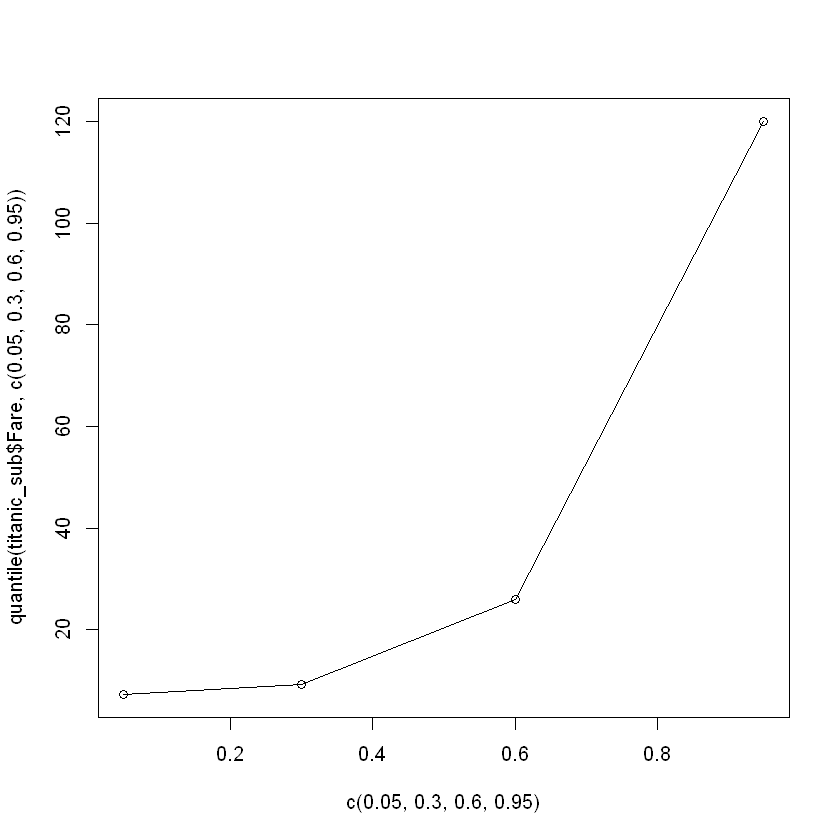

In [30]:
plot(c(0.05, 0.3, 0.6, 0.95), quantile(titanic_sub$Fare, c(0.05, 0.3, 0.6, 0.95)),type = 'o')

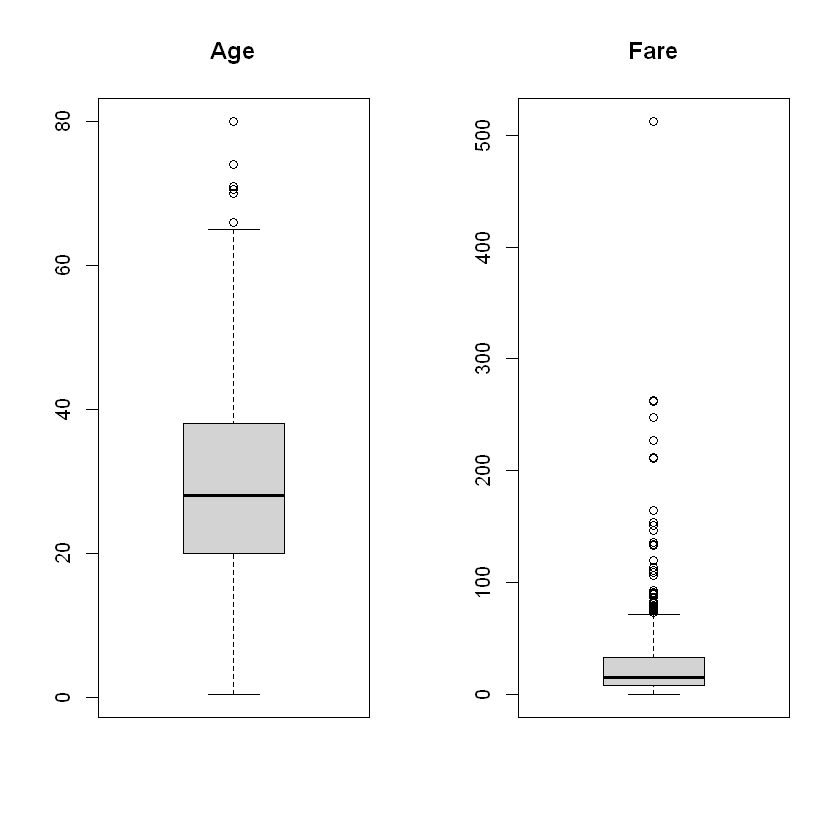

In [31]:
par(mfrow=c(1,2))
boxplot(titanic_sub$Age, main='Age')
boxplot(titanic_sub$Fare, main='Fare')

In [32]:
# Age has some outliers:
Age_outliers = c(boxplot.stats(titanic_sub$Age)$out)
Age_outliers = sum(sapply(Age_outliers, function(x) length(unique(x))))

print(paste('Number of Age outliers: ', Age_outliers))

[1] "Number of Age outliers:  8"


In [33]:
# Fare has some outliers:
Fare_outliers = c(boxplot.stats(titanic_sub$Fare)$out)
Fare_outliers = sum(sapply(Fare_outliers, function(x) length(unique(x))))

print(paste('Number of Fare outliers: ', Fare_outliers))

[1] "Number of Fare outliers:  94"


In [34]:
Survived = table(titanic_sub$Survived)
colors1 = c('red','blue')

PClass = table(titanic_sub$Pclass)
colors2 = c('green','orange', 'violet')

Sex = table(titanic_sub$Sex)
colors3 = c('cyan','yellow')

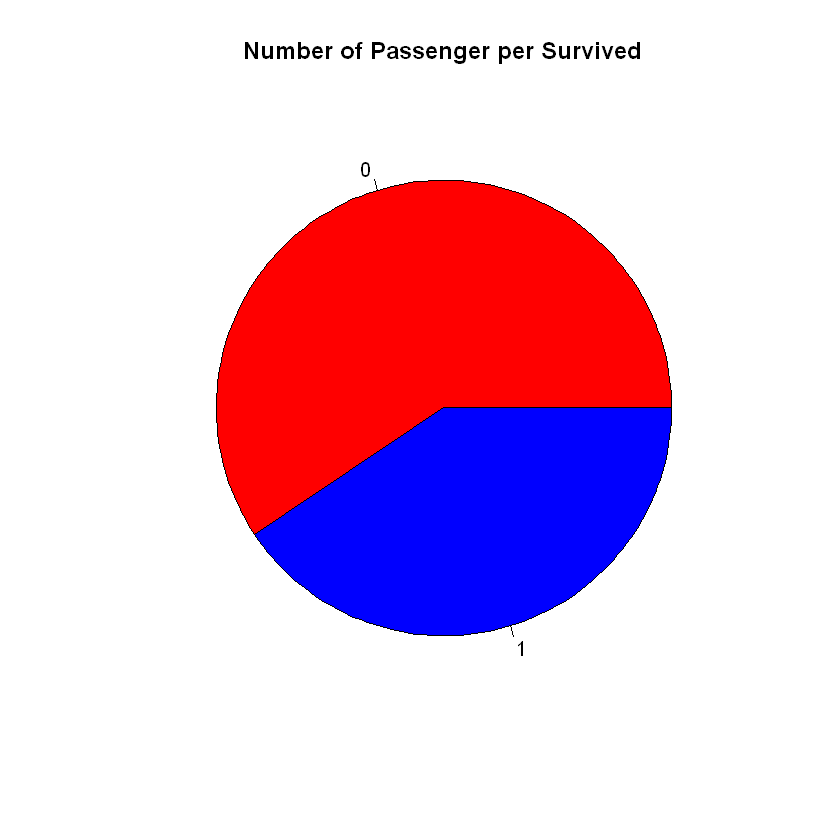

In [35]:
pie(Survived, col=colors1, main="Number of Passenger per Survived")

- The number of passengers alive is lower than deaths

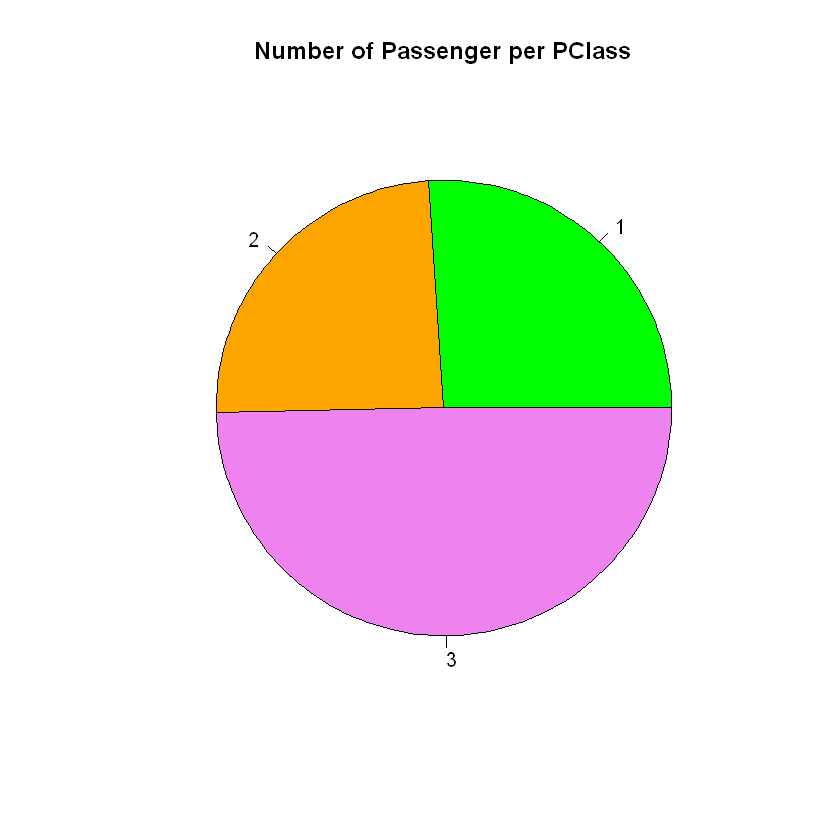

In [36]:
pie(PClass, col=colors2, main="Number of Passenger per PClass")

- The class 3 has highest amount of passengers

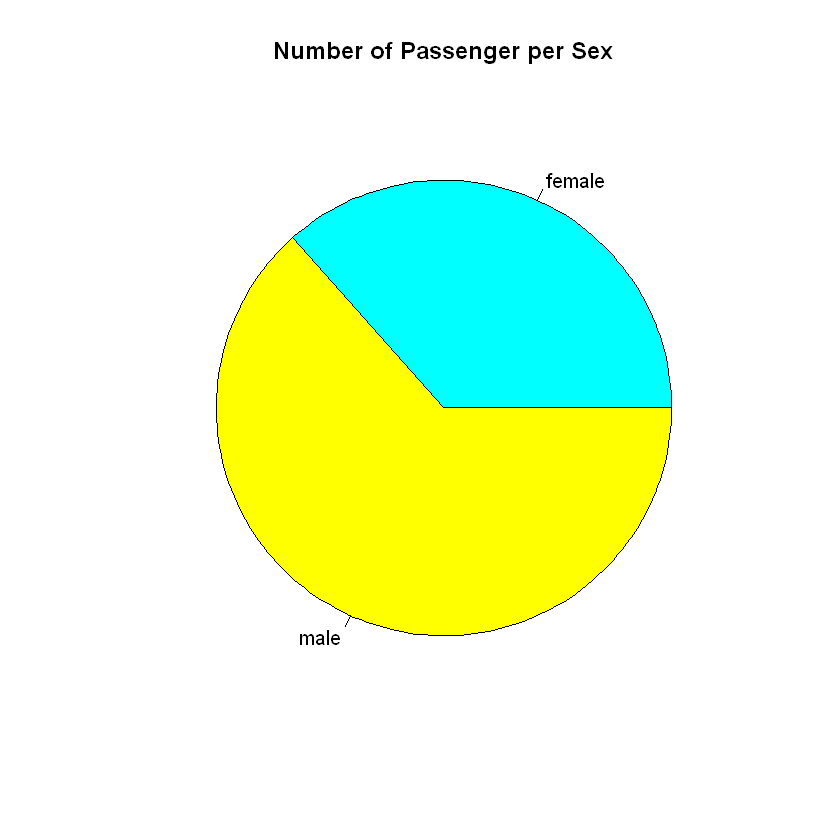

In [37]:
pie(Sex, col=colors3, main="Number of Passenger per Sex")

- The number of male is higher than female

In [38]:
# calculate variance for numeric attributes
sapply(titanic_sub['Age'], var)
sapply(titanic_sub['Fare'], var)

Age 
211.0191

Fare 
2800.413

In [39]:
# calculate variance for numeric attributes
sapply(titanic_sub['Age'], var)
sapply(titanic_sub['Fare'], var)

Age 
211.0191

Fare 
2800.413

In [40]:
library(moments)

In [41]:
skewness(titanic_sub$Age)

[1] 0.3882899

- The distribution is right skewness

In [42]:
skewness(titanic_sub$Fare)

[1] 4.643848

- The distribution is right skewness

In [43]:
kurtosis(titanic_sub$Age)

[1] 3.168637

- The distribution is higher than the standard distribution

In [44]:
kurtosis(titanic_sub$Fare)

[1] 33.69973

- The distribution is higher than the standard distribution

In [45]:
library(ggExtra)
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'



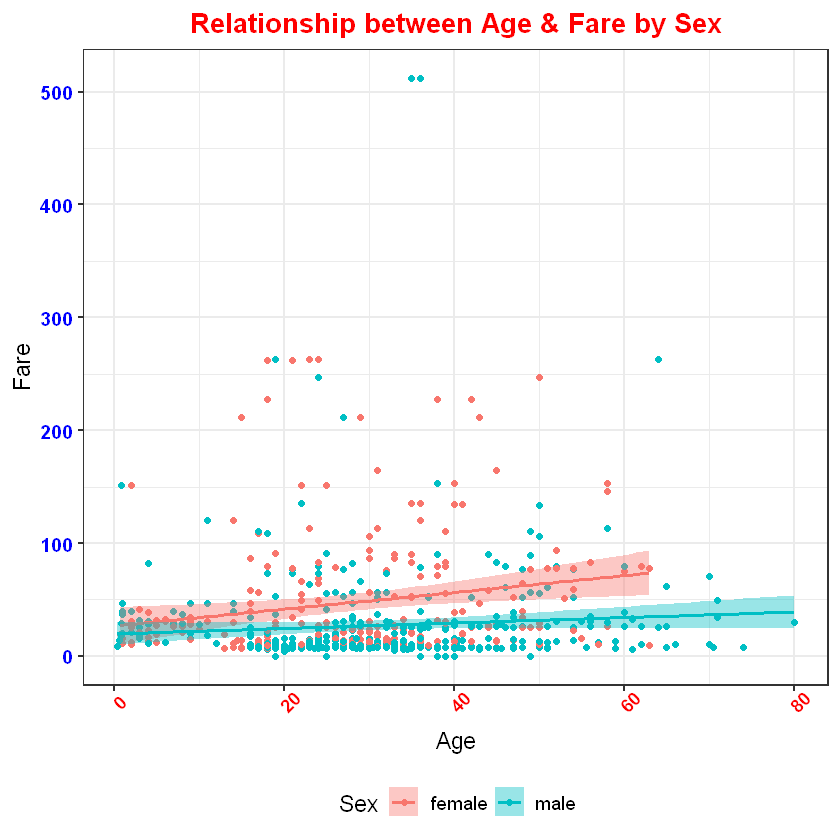

In [46]:
plot = ggplot(data=titanic_sub, aes(x = Age, y = Fare, color = Sex, fill=Sex)) + 
    geom_point() + 
    ylab('Fare') +
    xlab('Age') +
    ggtitle('Relationship between Age & Fare by Sex') +
    theme_bw(base_size = 14) +
    geom_smooth(method='lm') +
    theme(legend.position='bottom',
         plot.title = element_text(color='red',size=16,face='bold',hjust=0.5),
         axis.text.x = element_text(face='bold', color='red',angle=45),
         axis.text.y = element_text(face='bold',color='blue'))
plot

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



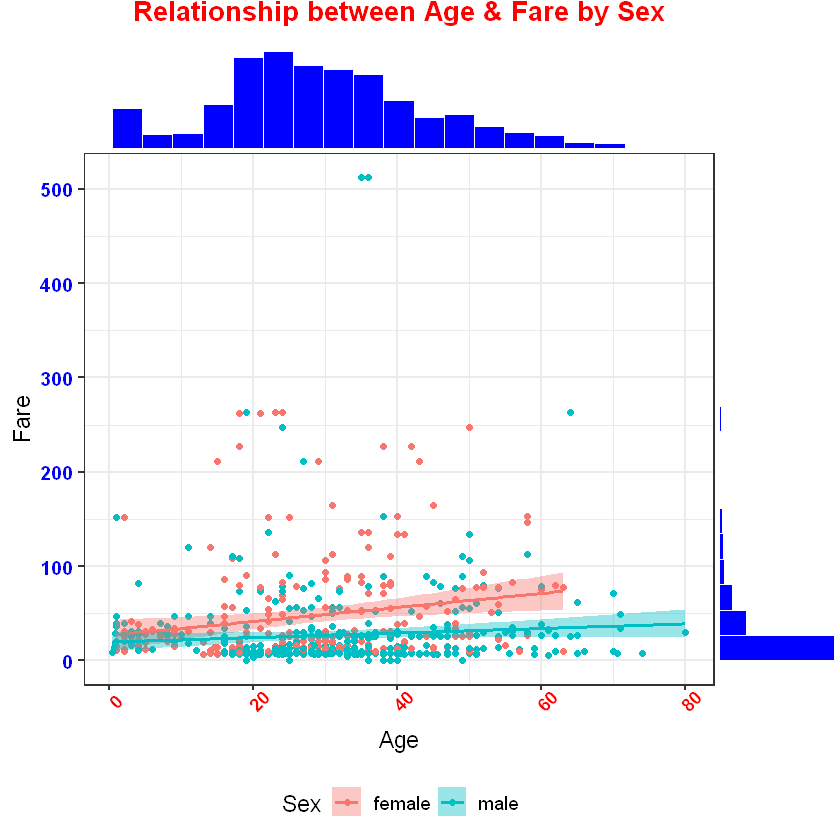

In [47]:
ggMarginal(plot, type='histogram', col='white',
          fill = 'blue',bins=20)

## Remarks: 
- The most data distribute around Age 20 to 40
- In the range x=20 and x=45: adults with the largest ticket fares
- In the rang x=10 and x=45, adults from lower classes on the boat
- Almost Female passengers have Age < 50, higher Fare
- While Male passengers have Age from 0 to 80, almost Fare < 100

In [50]:
cov(titanic_sub$Age, titanic_sub$Fare)

[1] 73.84903

- In these results, the covariance between Age and Fare is approximately 73.8490298146193, which indicates that the relationship is strongly positive

In [51]:
cor(titanic_sub$Age, titanic_sub$Fare)

[1] 0.09606669

- The result shows that there is a slightly correlation (0.096) between Age & Fare

In [61]:
library(dplyr)
result_Fare_over_50 = filter(titanic_sub, Fare >= 50)
nrow(result_Fare_over_50)

[1] 138

In [63]:
prob = nrow(result_Fare_over_50)/nrow(titanic_sub$Fare)
prob

numeric(0)

In [68]:
p1 = pnorm(49, mean=mean(titanic_sub$Fare), sd=sd(titanic_sub$Fare), lower.tail=FALSE)
print(paste('Percentage of samples having Fare >= 50:',p1))

[1] "Percentage of samples having Fare >= 50: 0.393453834972388"


In [73]:
p2 = pnorm(50, mean=mean(titanic_sub$Fare), sd=sd(titanic_sub$Fare), lower.tail=TRUE) - pnorm(29, mean=mean(titanic_sub$Fare), sd=sd(titanic_sub$Fare), lower.tail=FALSE)
print(paste('Percentage of samples having Fare >= 30 and Fare <= 30:',p2))

[1] "Percentage of samples having Fare >= 30 and Fare <= 30: 0.0709486830126981"
